In [0]:
import numpy as np
import matplotlib.pyplot as plt

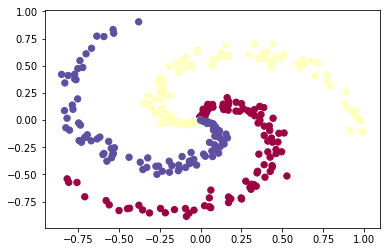

In [63]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [23]:
w=np.random.randn(D,K)
b=np.zeros((1,K))
score=np.dot(X,w)+b
score.shape

(300, 3)

In [7]:
num_examples=X.shape[0]
num_examples

300

In [13]:
exp_score=np.exp(score)
probs=exp_score/np.sum(exp_score,axis=1,keepdims=True)
log_probs=-np.log(probs[range(num_examples),y])
log_probs.shape

(300,)

In [15]:
step=1e-0
reg=1e-3
data_loss=np.sum(log_probs)/num_examples
reg_loss=0.5*reg*np.sum(w*w)
loss=data_loss+reg_loss
loss

1.1697447212186791

In [0]:
dscores=probs
dscores[range(num_examples),y]-=1
dscores/=num_examples

In [0]:
dw=np.dot(X.T,dscores)
db=np.sum(dscores,axis=0,keepdims=True)
dw+=reg*w

In [0]:
w+=step*dw
b+=step*db

In [57]:
w = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))
step = 1e-0
reg = 1e-3
num_examples = X.shape[0]
for i in range(200):
  score = np.dot(X, w) + b
  exp_score=np.exp(score)
  probs=exp_score/np.sum(exp_score,axis=1,keepdims=True)
  log_probs=-np.log(probs[range(num_examples),y])
  
  data_loss=np.sum(log_probs)/num_examples
  reg_loss=0.5*reg*np.sum(w*w)
  loss=data_loss+reg_loss
  if i % 10 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  dscores=probs
  dscores[range(num_examples),y]-=1
  dscores/=num_examples
  
  dw=np.dot(X.T,dscores)
  db=np.sum(dscores,axis=0,keepdims=True)
  dw+=reg*w
  
  w+=-step*dw
  b+=-step*db 

iteration 0: loss 1.098969
iteration 10: loss 0.913806
iteration 20: loss 0.844705
iteration 30: loss 0.813015
iteration 40: loss 0.796353
iteration 50: loss 0.786773
iteration 60: loss 0.780916
iteration 70: loss 0.777174
iteration 80: loss 0.774705
iteration 90: loss 0.773033
iteration 100: loss 0.771880
iteration 110: loss 0.771071
iteration 120: loss 0.770497
iteration 130: loss 0.770086
iteration 140: loss 0.769788
iteration 150: loss 0.769571
iteration 160: loss 0.769413
iteration 170: loss 0.769296
iteration 180: loss 0.769210
iteration 190: loss 0.769146


In [58]:
loss

0.769102059519806

In [67]:
# multilayer
h=100
w1=0.01*np.random.randn(D,h)
b1=np.zeros((1,h))
w2=0.01*np.random.randn(h,K)
b2=np.zeros((1,K))
step=1e-0
reg=1e-3
num_examples=X.shape[0]
for i in range(10000):
  hidden_layer=np.maximum(0,np.dot(X,w1)+b1)
  scores=np.dot(hidden_layer,w2)+b2
  exp_scores=np.exp(scores)
  probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
  log_probs=-np.log(probs[range(num_examples),y])
  data_loss=np.sum(log_probs)/num_examples
  reg_loss=0.5*reg*np.sum(w1*w1)+0.5*reg*np.sum(w2*w2)
  loss=data_loss+reg_loss
  
  if i % 1000 == 0:
    print ("iteration %d: loss %f" % (i, loss))
    
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  dw2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  dhidden = np.dot(dscores, w2.T)
  dhidden[hidden_layer <= 0] = 0
  dw = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  dw2 += reg * w2
  dw += reg * w1
  
  w1 += -step * dw
  b1 += -step * db
  w2 += -step * dw2
  b2 += -step * db2

iteration 0: loss 1.099008
iteration 1000: loss 0.288070
iteration 2000: loss 0.253491
iteration 3000: loss 0.240158
iteration 4000: loss 0.237359
iteration 5000: loss 0.236650
iteration 6000: loss 0.236175
iteration 7000: loss 0.235921
iteration 8000: loss 0.235765
iteration 9000: loss 0.235653
